In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.pyplot import cycler
mpl.style.use('classic')

import baraffe_tables
from baraffe_tables.table_search import baraffe_table_search

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil

%matplotlib inline

In [2]:
mJtomSun = u.jupiterMass.to(u.solMass)
mJtoGrams = u.jupiterMass.to(u.g)

rJtorSun = u.jupiterRad.to(u.solRad)
rJtoCm = u.jupiterRad.to(u.cm)


In [3]:
history_basic = Table.read("./LOGS_basic/history.data", format="ascii", header_start=4, data_start=5)
history_pp_extras = Table.read("./LOGS_pp_extras/history.data", format="ascii", header_start=4, data_start=5)

profile_basic = Table.read("./LOGS_basic/profile3.data", format="ascii", header_start=4, data_start=5)
profile_pp_extras = Table.read("./LOGS_pp_extras/profile3.data", format="ascii", header_start=4, data_start=5)
print(profile_basic.colnames)
print(profile_pp_extras.colnames)

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'dm', 'q', 'xq', 'radius', 'rmid', 'acoustic_radius', 'temperature', 'energy', 'entropy', 'pressure', 'prad', 'pgas', 'grada', 'log_csound', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'total_energy', 'gradT', 'gradr', 'gradL', 'sch_stable', 'ledoux_stable', 'mixing_type', 'tau', 'brunt_N2', 'brunt_N2_structure_term', 'brunt_N2_composition_term', 'log_brunt_N2_structure_term', 'log_brunt_N2_composition_term', 'brunt_A', 'brunt_A_div_x2', 'brunt_N2_dimensionless', 'brunt_N_dimensionless', 'brunt_frequency', 'brunt_N', 'log_brunt_N', 'log_brunt_N2', 'log_brunt_N2_dimensionless', 'brunt_B', 'brunt_nonB', 'log_brunt_B', 'log_brunt_nonB', 'sign_brunt_N2', 'brunt_nu', 'log_brunt_nu', 'lamb_S', 'lamb_S2', 'lamb_Sl1', 'lamb_Sl2', 'lamb_Sl3', 'lamb_Sl10', 'log_lamb_Sl1', 'log_lamb_Sl2', 'log_lamb_Sl3', 'log_lamb_Sl10', 'brunt_N_div_r_integral', 'k_r_integral', 'br

In [22]:
def get_cycle(cmap, N=None, use_index="auto"):
    if isinstance(cmap, str):
        if use_index == "auto":
            if cmap in ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']:
                use_index=True
            else:
                use_index=False
        cmap = matplotlib.colormaps[cmap]
    if not N:
        N = cmap.N
    if use_index=="auto":
        if cmap.N > 100:
            use_index=False
        elif isinstance(cmap, LinearSegmentedColormap):
            use_index=False
        elif isinstance(cmap, ListedColormap):
            use_index=True
    if use_index:
        ind = np.arange(int(N)) % cmap.N
        return cycler("color",cmap(ind))
    else:
        colors = cmap(np.linspace(0,1,N))
        return cycler("color",colors)

def plot_history_mass_fractions(history_table, species_to_plot=['average_h1', 'average_h2', 'average_he3', 'average_he4', 'average_li7', 'average_be7', 'average_b8', 'average_c12', 'average_n14', 'average_o16', 'average_ne20', 'average_mg24'], 
                        color_list = [],
                        save=False, savefilename=None):

    fig, ax  = plt.subplots(1,1,figsize=(8,6))
    ax.set_prop_cycle(get_cycle('tab10', 9))

    for i, species in enumerate(species_to_plot):
        ax.plot(history_table['star_age'], history_table[species], linestyle='-',marker='None',label=species)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('star age')
    ax.set_ylabel('average mass fraction')
    ax.legend(loc='best',fontsize=10)
    #ax.set_xlim(1.e-1,1.)
    ax.set_ylim(1.e-9,1.)
    
    if save is False:
        plt.show()
    else:
        plt.savefig(savefilename,bbox_inches='tight')
        
    return

def plot_profile_mass_fractions(profile_table, species_to_plot=['h1', 'h2', 'he3', 'he4', 'li7', 'be7', 'b8', 'c12', 'n14', 'o16', 'ne20', 'mg24'],
                        color_list = [],
                        save=False, savefilename=None):

    fig, ax  = plt.subplots(1,1,figsize=(8,6))
    ax.set_prop_cycle(get_cycle('tab10', 9))

    for i, species in enumerate(species_to_plot):
        ax.plot(profile_table['xq'], profile_table[species], linestyle='-',marker='None',label=species)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('mass exterior to cell')
    ax.set_ylabel('mass fraction in cell')
    ax.legend(loc='best',fontsize=10)
    #ax.set_xlim(1.e-1,1.)
    ax.set_ylim(1.e-9,1.)
    
    if save is False:
        plt.show()
    else:
        plt.savefig(savefilename,bbox_inches='tight')
        
    return

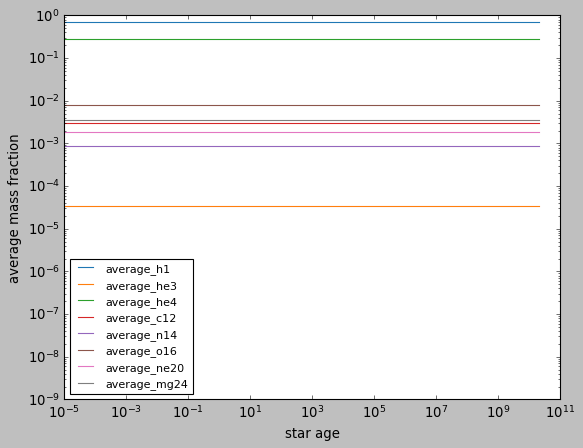

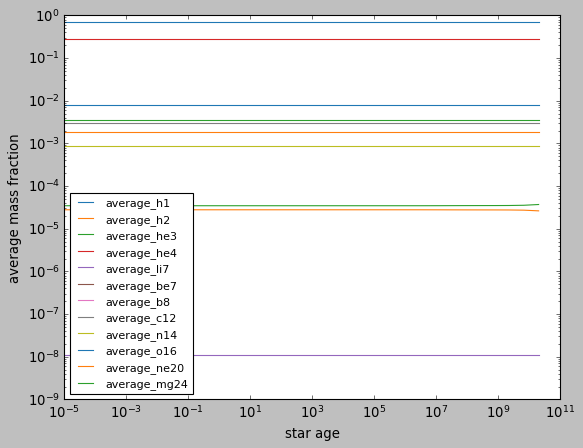

In [23]:
plot_history_mass_fractions(history_basic, species_to_plot=['average_h1', 'average_he3', 'average_he4', 'average_c12', 'average_n14', 'average_o16', 'average_ne20', 'average_mg24'])
plot_history_mass_fractions(history_pp_extras)

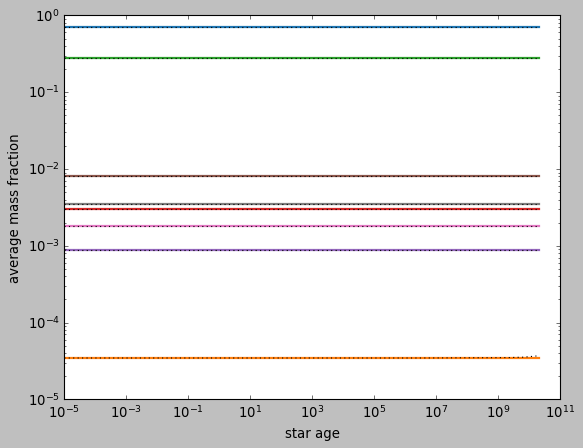

In [24]:
comparison_species=['average_h1', 'average_he3', 'average_he4', 'average_c12', 'average_n14', 'average_o16', 'average_ne20', 'average_mg24']
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_prop_cycle(get_cycle('tab10', 9))

for cs in comparison_species:
    ax.plot(history_basic['star_age'], history_basic[cs], ls='-',lw=2,zorder=1)
    ax.plot(history_pp_extras['star_age'], history_pp_extras[cs], color='k', ls=':',lw=1,zorder=2)

ax.set_xlabel('star age')
ax.set_ylabel('average mass fraction')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


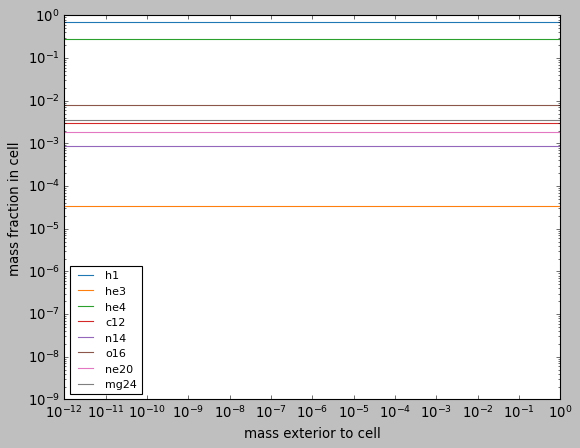

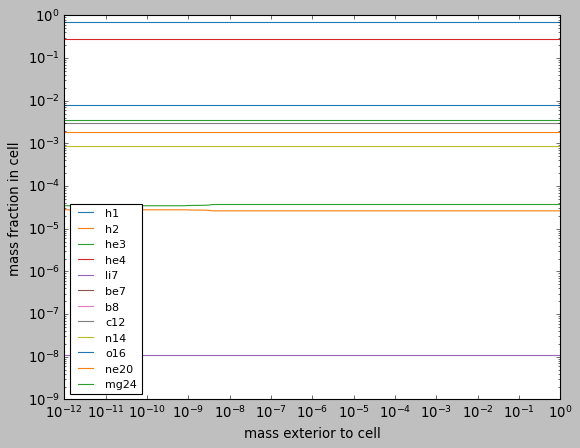

In [25]:
plot_profile_mass_fractions(profile_basic, species_to_plot=['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24'])
plot_profile_mass_fractions(profile_pp_extras)

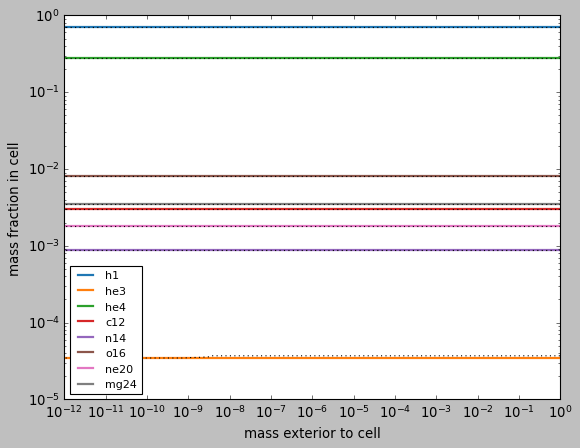

In [26]:
comparison_species=['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24']
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_prop_cycle(get_cycle('tab10', 9))

for cs in comparison_species:
    ax.plot(profile_basic['xq'], profile_basic[cs], ls='-',lw=2,zorder=1,label=cs)
    ax.plot(profile_pp_extras['xq'], profile_pp_extras[cs], color='k', ls=':',lw=1,zorder=2)

ax.set_xlabel('mass exterior to cell')
ax.set_ylabel('mass fraction in cell')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best',fontsize=10)
plt.show()
